In [1]:
%matplotlib inline
#%matplotlib
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
import string
import matplotlib.cm
from matplotlib import pyplot as plt

In [2]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

def ground_temps(fdir,y_lim,arg,file_name):

    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=fdir)
    keys, times, dat = parse_xmf.readATS(directory=fdir)
    z = dati[0,0,:]
    zero=np.zeros(z.shape)

    id_max=np.argmax(dati[5,:,-1]); id_min=np.argmin(dati[5,:,-1])
    a=np.zeros(len(z));b=np.zeros(len(z)); c=np.zeros(len(z))
    #print 'n:',len(z)
    

    if arg=='temp':
        for i in range(len(z)):
            a[i]=min(dati[5,:,i])
            b[i]=max(dati[5,:,i])
            c[i]=np.mean(dati[5,:,i])
        plt.plot(a-273.15,z,c-273.15,z,b-273.15,z,linewidth=2.0)
        
        plt.plot(zero, z, 'k--',linewidth=2.0)
        #plt.title('test title', fontsize=20)
        plt.xlabel('Temperature [C]', fontsize=16)
        plt.legend( ['$T_{min}$', '$T_{mean}$','$T_{max}$'], fontsize=16, loc=0)
        t_max=dati[5,id_max,-1]- 273.15
        t_min=dati[5,id_min,-1]- 273.15
        plt.xlim(t_min, t_max)
        temp=np.linspace(t_min, t_max, len(b))
        idx = np.argwhere(np.diff(np.sign(b-273.15 - zero)) != 0).reshape(-1) + 0
        if len(idx)==2:        
            if b[idx[1]]<273.15:
                alt=(z[idx[1]]+z[idx[1]+1])/2
                #print c[idx[0]], c[idx[0]+1]
            else:
                alt=(z[idx[1]]+z[idx[1]-1])/2
                #print c[idx[0]], c[idx[0]+1]
        print idx,z[idx[1]], b[idx[1]],'alt:',alt
        plt.plot(temp,alt*np.ones(z.shape), 'c-',linewidth=1.0)
        
        print 'T surf amplitude:', (np.max(dati[5,:,-1]-273.15)-np.min(dati[5,:,-1]-273.15))/2 
        print 'Mean Annual Surf Temp.:', np.mean(dati[5,:,-1]-273.15)
    else:
        for i in range(len(z)):
            a[i]=min(dati[2,:,i])
            b[i]=max(dati[2,:,i])
            c[i]=np.mean(dati[2,:,i])
        plt.plot(a,z,c,z,b,z,linewidth=2.0)
        plt.legend( ['$s_{l,min}$', '$s_{l,mean}$','$s_{l,max}$'], fontsize=16, loc=0)
        plt.xlim(0, 1)
        plt.xlabel('Saturation liquid [-]', fontsize=16)
        satl=np.linspace(0, 1, len(b))
        plt.plot(satl,-1.32*np.ones(z.shape), 'c-',linewidth=1.0)

    
    plt.tick_params(labelsize=16)
    plt.ylim(-y_lim, 0)

    #plt.savefig(file_name, bbox_inches='tight')

In [5]:
def plot_tests(diii):
    fig = plt.figure()
    fig.set_figheight(10); fig.set_figwidth(12)
    #fig.subplots_adjust(hspace=.6)

    ax1=fig.add_subplot(2,2,1)
    ground_temps(diii,29,'temp','temp_2m.pdf')
    plt.ylabel('z-coordinate [m]', fontsize=16)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[0]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,2)
    ground_temps(diii,29,'sat','temp_2m.pdf')
    ax1.text(-0.1, 1.05, string.ascii_uppercase[1]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,3)
    ground_temps(diii,2,'temp','temp_2m.pdf')
    plt.ylabel('z-coordinate [m]', fontsize=16)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[2]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,4)
    ground_temps(diii,2,'sat','temp_2m.pdf')
    plt.text(0.8, -1.3, r'ALT', fontsize=20)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[3]+')', transform=ax1.transAxes, size=22, weight='bold')

    fig.tight_layout()
    #plt.savefig('../Copernicus_LaTeX_Package/figures/fig_1Dcase.pdf', bbox_inches='tight')

[ 1 11] -1.23730920776 273.099910916 alt: -1.16920010711
T surf amplitude: 7.70522716242
Mean Annual Surf Temp.: 0.918980522389
[ 1 11] -1.23730920776 273.099910916 alt: -1.16920010711
T surf amplitude: 7.70522716242
Mean Annual Surf Temp.: 0.918980522389


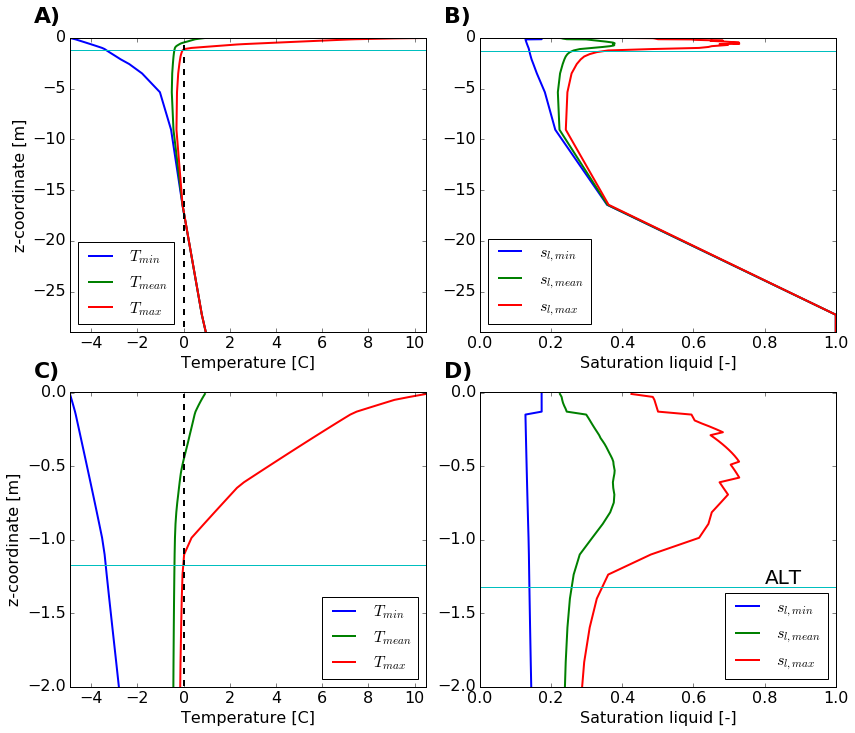

In [7]:
plot_tests("test7/test7-organic.regression.gold")

[ 1 12] -1.10109100646 273.131958448 alt: -1.04433342259
T surf amplitude: 15.6700333434
Mean Annual Surf Temp.: 0.542868912009
[ 1 12] -1.10109100646 273.131958448 alt: -1.04433342259
T surf amplitude: 15.6700333434
Mean Annual Surf Temp.: 0.542868912009


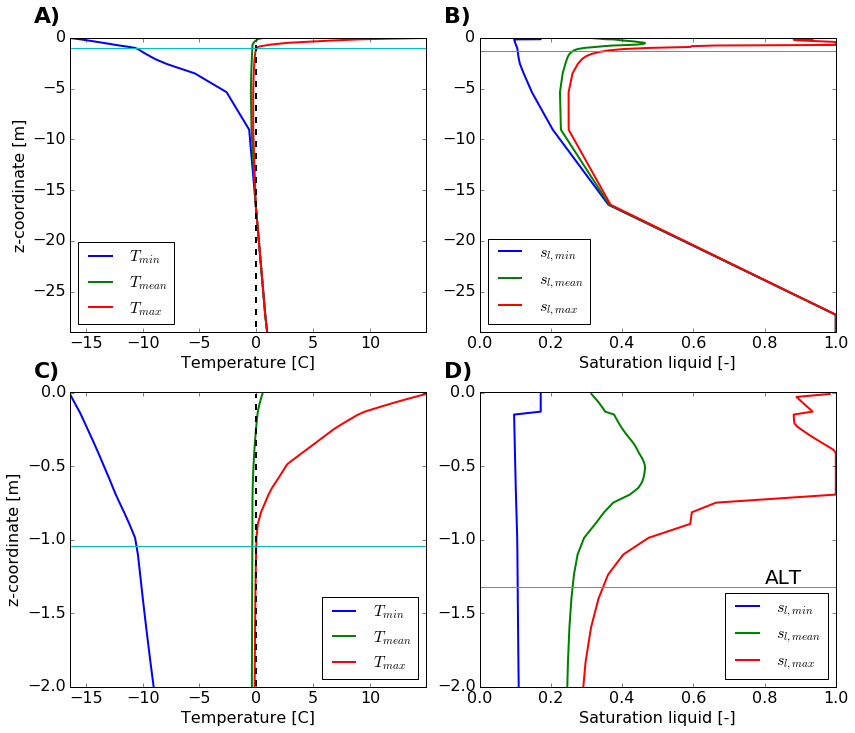

In [8]:
plot_tests("test8/test8.regression")